In [5]:
### Edgar Ernesto Cristal Coyoy
### Carné:  22007686

###Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
### Importación de base de datos

dataHP=pd.read_csv('train_hp.csv')
dataHP.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
### Verificar numero de filas y columnas del Data set

dataHP=pd.read_csv('train_hp.csv')
dataHP.shape

(1460, 81)

Extraemos Columnas con NAN

In [8]:
## Mostrar datos del Data set
dataHP.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
### Identificación de columnas con valor nulo

cols_con_na=[col for col in dataHP.columns if(dataHP[col].isnull().mean()>0)]
cols_con_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [10]:
### Tipo de datos según datos de cada columna

dataHP[cols_con_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [11]:
### Determinación de columnas con valores Nulos (cantidad de valores nulos por columnas)

prop_nan_per_col=dataHP[cols_con_na].isnull().sum()
prop_nan_per_col

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [12]:
### Determinación de columnas con valores Nulos (Promedio por columnas)

prop_nan_per_col=dataHP[cols_con_na].isnull().mean()
prop_nan_per_col

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [13]:
### Verificación de columnas que pueden se pueden rescatar para el análisis con menor cantidad de nulos

cols_rescatables=[col for col in dataHP.columns if(dataHP[col].isnull().mean()<=0.05)]
cols_rescatables

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

 Complete Case Analysis (CCA)

In [14]:
## Se dejan solo las columnas que tienen casos completos, es decir no tienen ningún nulo.
data_HP_noNAN = dataHP[cols_rescatables].dropna()
dataHP.shape, data_HP_noNAN.shape

((1460, 81), (1412, 70))

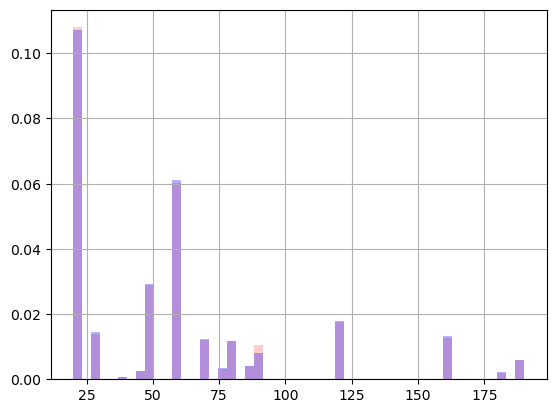

In [15]:
dataHP['MSSubClass'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['MSSubClass'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

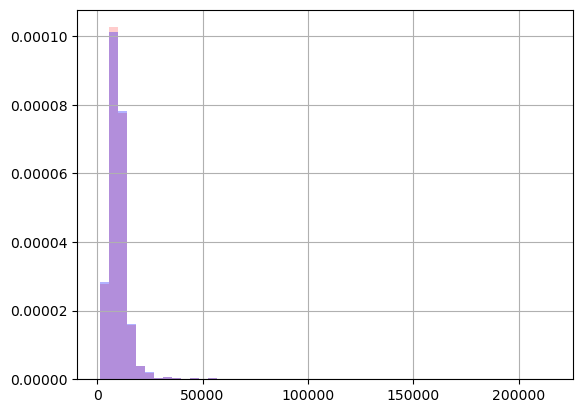

In [16]:
dataHP['LotArea'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['LotArea'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

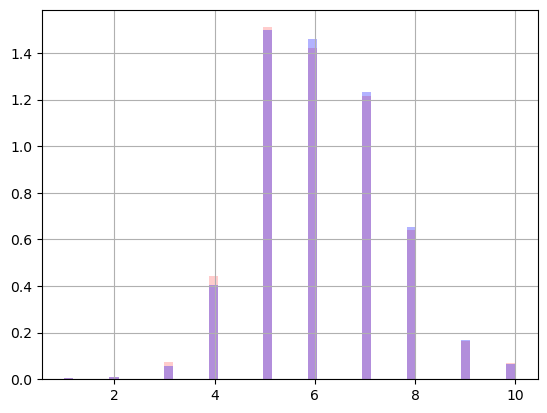

In [17]:
dataHP['OverallQual'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['OverallQual'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

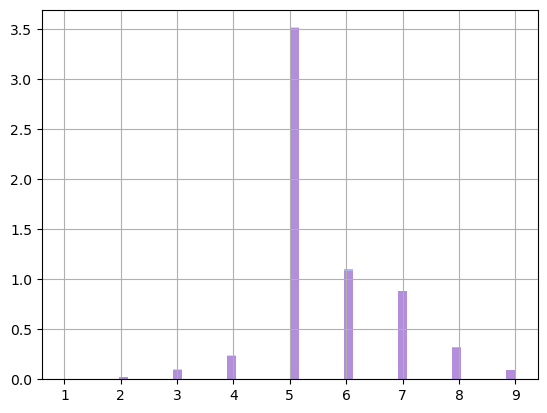

In [18]:
dataHP['OverallCond'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['OverallCond'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

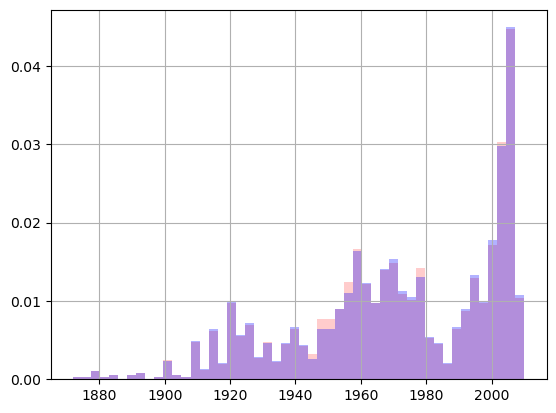

In [19]:
dataHP['YearBuilt'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['YearBuilt'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

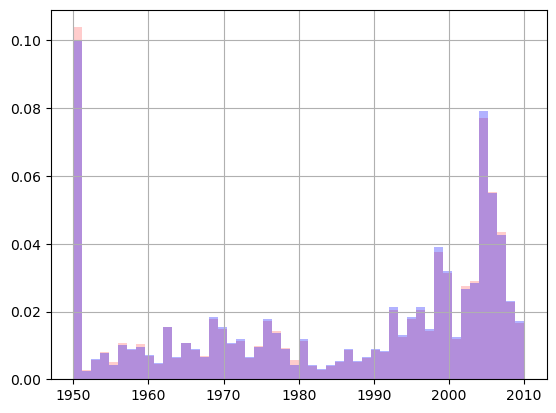

In [20]:
dataHP['YearRemodAdd'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['YearRemodAdd'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

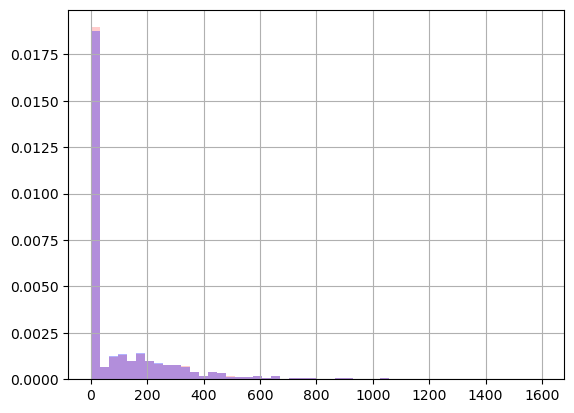

In [21]:
dataHP['MasVnrArea'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['MasVnrArea'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

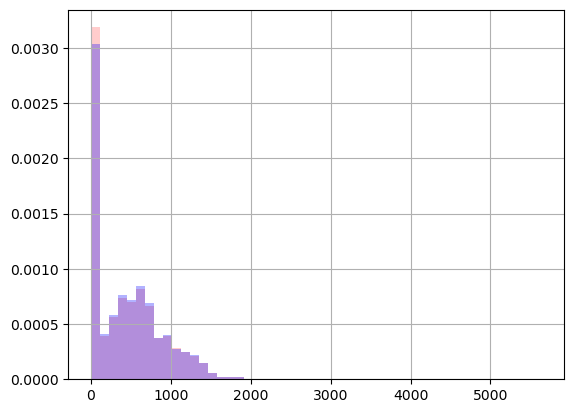

In [22]:
dataHP['BsmtFinSF1'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['BsmtFinSF1'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

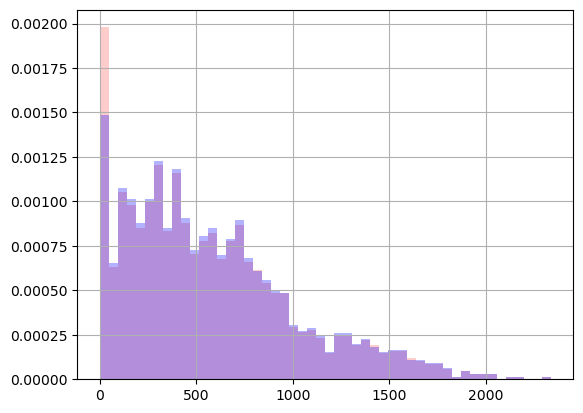

In [23]:
dataHP['BsmtUnfSF'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['BsmtUnfSF'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

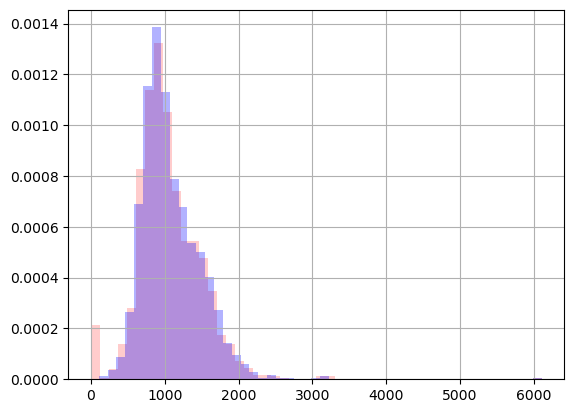

In [24]:
dataHP['TotalBsmtSF'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['TotalBsmtSF'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

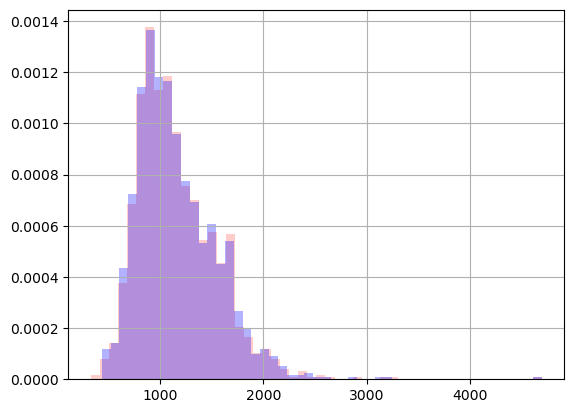

In [25]:
dataHP['1stFlrSF'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['1stFlrSF'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

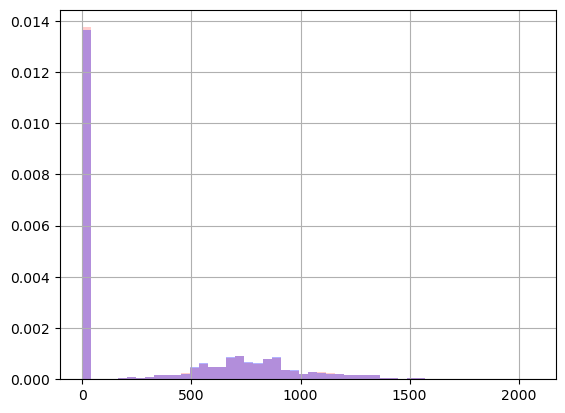

In [26]:
dataHP['2ndFlrSF'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['2ndFlrSF'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

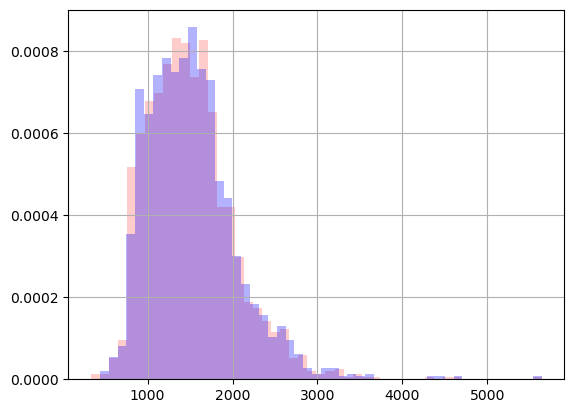

In [27]:
dataHP['GrLivArea'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['GrLivArea'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

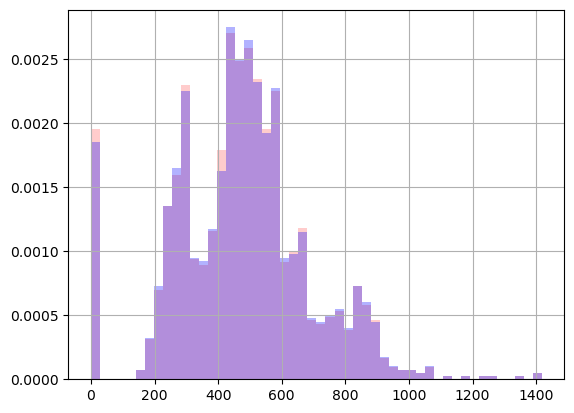

In [28]:
dataHP['GarageArea'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['GarageArea'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

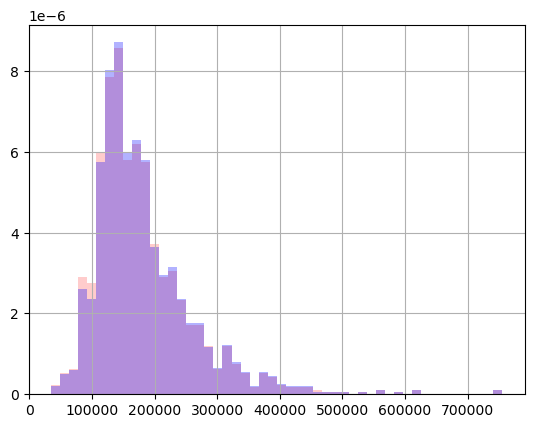

In [29]:
dataHP['SalePrice'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['SalePrice'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

In [48]:
### Verificación de 3 columnas del DATA SET
dataHP1=dataHP[['MSSubClass','LotFrontage','LotArea','SalePrice']]
dataHP1.head()

,MSSubClass,LotFrontage,LotArea,SalePrice
0,60,65.0,8450,208500
1,20,80.0,9600,181500
2,60,68.0,11250,223500
3,70,60.0,9550,140000
4,60,84.0,14260,250000


In [53]:
media=dataHP['LotFrontage'].mean()
mediana=dataHP['LotFrontage'].median()
print(f"Media:{media}")
print(f"Mediana:{mediana}")

Media:70.04995836802665
Mediana:69.0


In [52]:
dataHP['LotFrontage_Mean']=np.round(dataHP['LotFrontage'].fillna(media))
dataHP['LotFrontage_Median']=np.round(dataHP['LotFrontage'].fillna(mediana))

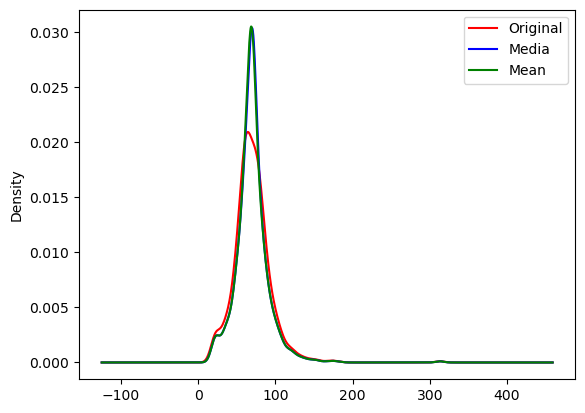

In [56]:
### Análisis de la variable LOTFRONTAGE

fig=plt.figure()
ax=fig.add_subplot(111)

dataHP['LotFrontage'].plot.density(color='red',label='Original')
dataHP['LotFrontage_Mean'].plot.density(color='blue',label='Media')
dataHP['LotFrontage_Median'].plot.density(color='green',label='Mean')
ax.legend()

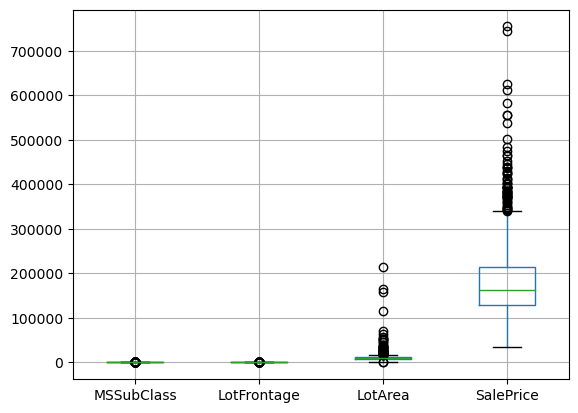

In [57]:
dataHP[['MSSubClass','LotFrontage','LotArea','SalePrice']].boxplot()
plt.show()

IMPUTACIÓN CATEGORICA

In [109]:
dataset_cat_missing=dataHP[['MSSubClass','GarageQual','BsmtQual','FireplaceQu','LotFrontage','LotArea','GarageArea','SalePrice']]
dataset_cat_missing.head()

,MSSubClass,GarageQual,BsmtQual,FireplaceQu,LotFrontage,LotArea,GarageArea,SalePrice
0,60,TA,Gd,NaN,65.0,8450,548,208500
1,20,TA,Gd,TA,80.0,9600,460,181500
2,60,TA,Gd,TA,68.0,11250,608,223500
3,70,TA,TA,Gd,60.0,9550,642,140000
4,60,TA,Gd,TA,84.0,14260,836,250000


In [110]:
dataset_cat_missing['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [111]:
dataset_cat_missing['GarageQual'].value_counts()/len(dataset_cat_missing)

TA    0.897945
Fa    0.032877
Gd    0.009589
Ex    0.002055
Po    0.002055
Name: GarageQual, dtype: float64

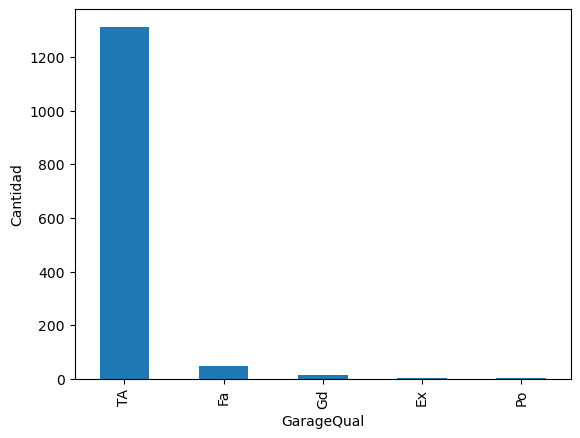

In [113]:
dataset_cat_missing['GarageQual'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("GarageQual")
plt.show()

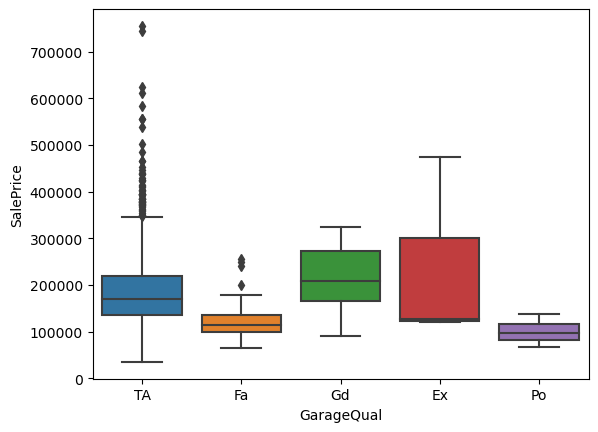

In [114]:
import seaborn as sns
sns.boxplot(x=dataset_cat_missing['GarageQual'], y=dataset_cat_missing['SalePrice'])
plt.show()

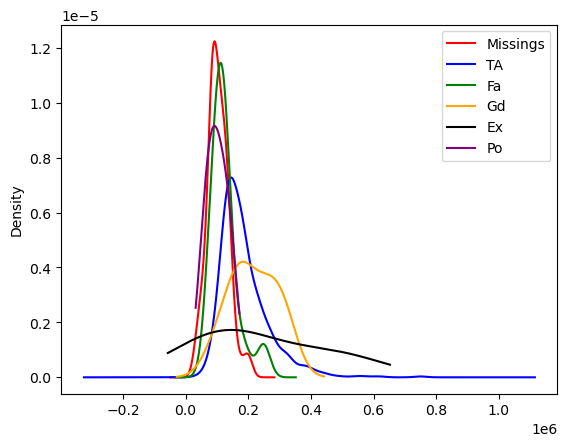

In [119]:
fig=plt.figure()
ax=fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['GarageQual'].isnull()]['SalePrice'].plot(kind="kde",color="red",label="Missings")
dataset_cat_missing[dataset_cat_missing['GarageQual']=='TA']['SalePrice'].plot(kind="kde",color="blue",label="TA")
dataset_cat_missing[dataset_cat_missing['GarageQual']=='Fa']['SalePrice'].plot(kind="kde",color="green",label="Fa")
dataset_cat_missing[dataset_cat_missing['GarageQual']=='Gd']['SalePrice'].plot(kind="kde",color="orange",label="Gd")
dataset_cat_missing[dataset_cat_missing['GarageQual']=='Ex']['SalePrice'].plot(kind="kde",color="Black",label="Ex")
dataset_cat_missing[dataset_cat_missing['GarageQual']=='Po']['SalePrice'].plot(kind="kde",color="Purple",label="Po")
ax.legend()
plt.show()

In [95]:
### Imputación de variable categorica.

### dataset_cat_missing['GarageQual'].fillna('Fa',inplace=True)

In [120]:
dataset_cat_missing['GarageQual'].value_counts()/len(dataset_cat_missing)

TA    0.897945
Fa    0.032877
Gd    0.009589
Ex    0.002055
Po    0.002055
Name: GarageQual, dtype: float64

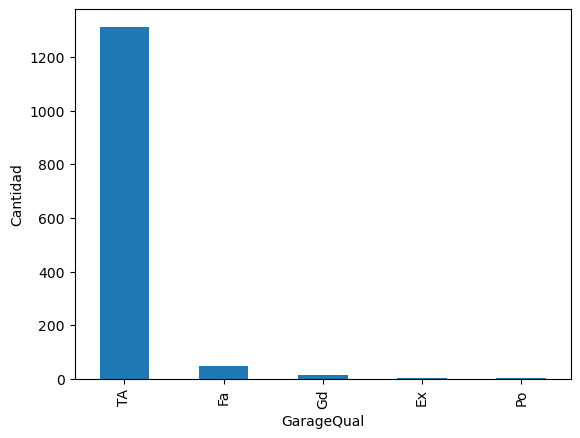

In [121]:
dataset_cat_missing['GarageQual'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("GarageQual")
plt.show()

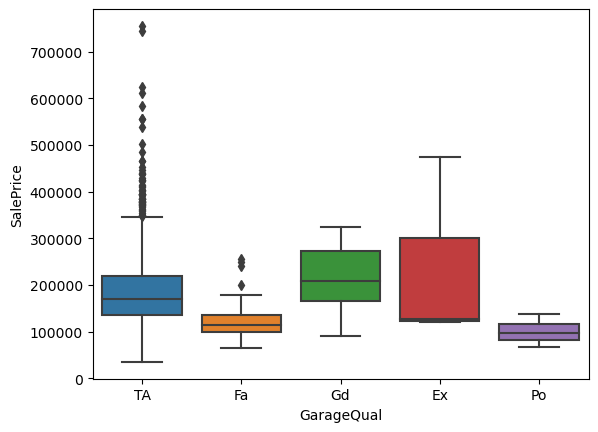

In [122]:
import seaborn as sns
sns.boxplot(x=dataset_cat_missing['GarageQual'], y=dataset_cat_missing['SalePrice'])
plt.show()

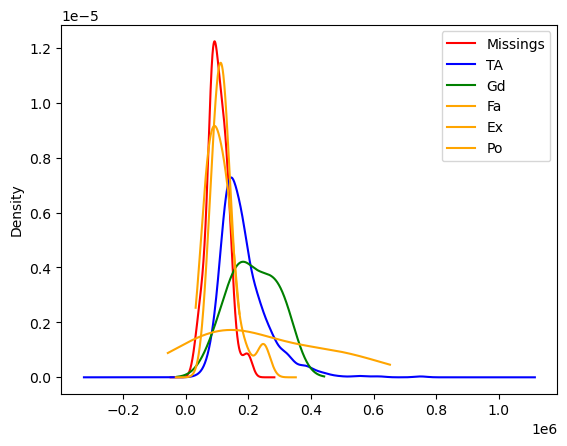

In [123]:
fig=plt.figure()
ax=fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['GarageQual'].isnull()]['SalePrice'].plot(kind="kde",color="red",label="Missings")
dataset_cat_missing[dataset_cat_missing['GarageQual']=='TA']['SalePrice'].plot(kind="kde",color="blue",label="TA")
dataset_cat_missing[dataset_cat_missing['GarageQual']=='Gd']['SalePrice'].plot(kind="kde",color="green",label="Gd")
dataset_cat_missing[dataset_cat_missing['GarageQual']=='Fa']['SalePrice'].plot(kind="kde",color="orange",label="Fa")
dataset_cat_missing[dataset_cat_missing['GarageQual']=='Ex']['SalePrice'].plot(kind="kde",color="orange",label="Ex")
dataset_cat_missing[dataset_cat_missing['GarageQual']=='Po']['SalePrice'].plot(kind="kde",color="orange",label="Po")
ax.legend()
plt.show()

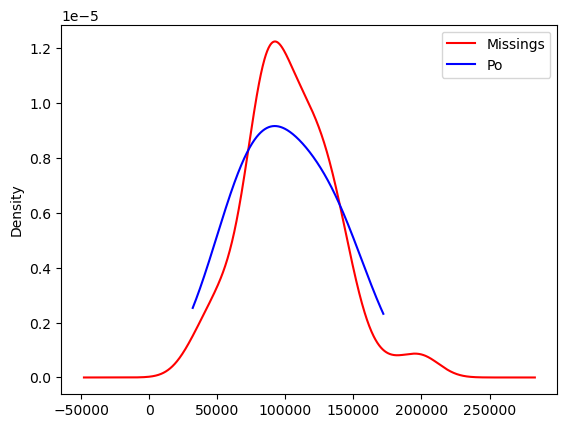

In [125]:
fig=plt.figure()
ax=fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['GarageQual'].isnull()]['SalePrice'].plot(kind="kde",color="red",label="Missings")
dataset_cat_missing[dataset_cat_missing['GarageQual']=='Po']['SalePrice'].plot(kind="kde",color="Blue",label="Po")
ax.legend()
plt.show()

In [101]:
### Imputación de variable categorica.

### dataset_cat_missing['GarageQual'].fillna('Po',inplace=True)

Codificación de Variables Categóricas

In [126]:
def getCategoryVars(dataset):
    cat_colnames=[]
    colnames=dataset.columns
    for col in colnames:
        if(dataset[col].dtype=='object'):
            cat_colnames.append(col)
    return cat_colnames

In [127]:
cat_cols=getCategoryVars(dataHP)
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [128]:
cat_cols.append('SalePrice')

In [129]:
dataset_categories=dataHP[cat_cols]
dataset_categories.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000


In [130]:
dataset_categories['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [131]:
pd.get_dummies(dataset_categories['GarageQual'])

,Ex,Fa,Gd,Po,TA
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
1455,0,0,0,0,1
1456,0,0,0,0,1
1457,0,0,0,0,1
1458,0,0,0,0,1


In [133]:
dataset_categories.shape

(1460, 44)

In [134]:
dfTemp=pd.get_dummies(dataset_categories)
dfTemp.shape

(1460, 253)

In [135]:
dfTemp=pd.get_dummies(dataset_categories)
dfTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 253 entries, SalePrice to SaleCondition_Partial
dtypes: int64(1), uint8(252)
memory usage: 370.8 KB


Frecuency Encoding

In [136]:
dataset_categories['GarageQual'].value_counts().sort_values(ascending=False)

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

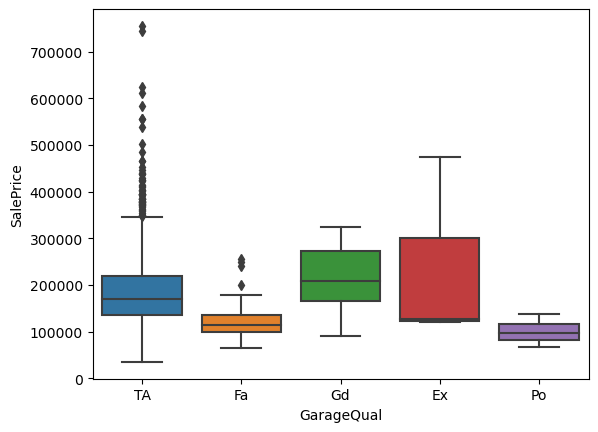

In [137]:
sns.boxplot(x=dataset_categories['GarageQual'], y=dataset_categories['SalePrice'])
plt.show()

In [143]:
GarageQual_freq_mapper=(dataset_categories['GarageQual'].value_counts().sort_values(ascending=False)).to_dict()
GarageQual_freq_mapper

{'TA': 1311, 'Fa': 48, 'Gd': 14, 'Ex': 3, 'Po': 3}

In [144]:
dataset_categories['GarageQual_code']=dataset_categories['GarageQual'].map(GarageQual_freq_mapper)
dataset_categories[['GarageQual','GarageQual_code']]

C:\Users\ecris\AppData\Local\Temp\ipykernel_24936\3454494255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['GarageQual_code']=dataset_categories['GarageQual'].map(GarageQual_freq_mapper)


,GarageQual,GarageQual_code
0,TA,1311.0
1,TA,1311.0
2,TA,1311.0
3,TA,1311.0
4,TA,1311.0
...,...,...
1455,TA,1311.0
1456,TA,1311.0
1457,TA,1311.0
1458,TA,1311.0
